In [1]:
import pandas as pd

In [11]:
data_path = 'data.csv'

Читай данные с помощью __`read_csv()`__ и погнали!

In [12]:
df = pd.read_csv(data_path)
df.head()

,Возраст,Пол,Состоит в браке,Иждивенцы,Доход,Опыт работы,Срок проживания,Недвижимость(кв.м.),Месячный платеж,Благонадежный заемщик
0,28.0,женский,Да,0.0,9000.0,9.0,7.0,0.0,3946.0,Нет
1,39.0,мужской,Да,1.0,13500.0,17.0,6.0,0.0,2460.0,Да
2,31.0,мужской,Нет,2.0,7000.0,11.0,3.0,0.0,3126.0,Нет
3,34.0,мужской,Нет,1.0,10200.0,15.0,2.0,41.0,3280.0,Да
4,46.0,женский,Да,2.0,8500.0,20.0,8.0,0.0,3348.0,Да


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1: Причесываем колонки</h3> 
    </div>
</div>

Окей, мы прочитали данные, но с ними еще не совсем удобно работать!

Прежде всего, __переименуй колонки__ так, чтобы они все были на старом-добром английском языке. Обычно предпочитают называть их __`likeThat`, `LikeThat`__ или __`like_that`__. Выбери что-то одно.

In [13]:
new_columns = ['Age', 'Sex', 'Married', 'Dependents', 'Income', 'Experience', 
               'TermOfStay', 'RealEstate', 'MonthlyPayment', 'Trustworthy']
df.rename(columns={ old: new for old, new in zip(df.columns, new_columns) }, inplace=True)
df.head()

,Age,Sex,Married,Dependents,Income,Experience,TermOfStay,RealEstate,MonthlyPayment,Trustworthy
0,28.0,женский,Да,0.0,9000.0,9.0,7.0,0.0,3946.0,Нет
1,39.0,мужской,Да,1.0,13500.0,17.0,6.0,0.0,2460.0,Да
2,31.0,мужской,Нет,2.0,7000.0,11.0,3.0,0.0,3126.0,Нет
3,34.0,мужской,Нет,1.0,10200.0,15.0,2.0,41.0,3280.0,Да
4,46.0,женский,Да,2.0,8500.0,20.0,8.0,0.0,3348.0,Да


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 2: Язык, понятный компуктору</h3> 
    </div>
</div>

Все русские слова - вон! Да, и значения в колонках в том числе. 

Замените все значения в колонках пола, признака состояния в браке и благонадежности на нули и единицы, раз уж уникальных значений в них не больше двух. __Подсказка:__ используй метод __`map()`__.

Убедитесь, что у вас все получилось, вызвав __`value_counts()`__ у соответствующих колоночек. А потом и проверьте тип данных с помощью __`info()`__

In [14]:
df.Sex = df.Sex.map({'мужской': 1, 'женский': 0})
df.Sex.value_counts()

1.0    650
0.0    349
Name: Sex, dtype: int64

In [20]:
df.Married = df.Married.map({'Да': 1, 'Нет': 0})
df.Married.value_counts()

1.0    590
0.0    409
Name: Married, dtype: int64

In [17]:
df.Trustworthy = df.Trustworthy.map({'Да': 1, 'Нет': 0})
df.Trustworthy.value_counts()

0.0    507
1.0    492
Name: Trustworthy, dtype: int64

<div class="panel panel-warning" style="margin: 0 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Бонус!</h3> 
    </div>
</div>

Удали строчку с __NaN__! Найди ее! И удали!

In [24]:
df.dropna(inplace = True)

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 3: Новые колонки</h3> 
    </div>
</div>

Помнишь еще, как создаются новые колонки? Ну ничего, погуглишь.

1. Сделай новую колонку __а-ля "удар по бюджету"__, значения в которой равны доле месячного платежа к величине дохода.
2. Посчитай в новой колонке __а-ля "размер семьи"__, сколько у заемщика человек в семье, то есть количество иждивенцев + муж/жена (если таковые имеются). 
2. Считая, что деньги в семье распределяются абсолютно честно, сделай новую колонку __а-ля "моя доля"__, значения в которой равны доходу (чистому, учитывая ежемесячный платеж!), деленному на количество человек в семье.

Вызови __.head()__ и полюбуйся в конце на результаты своей работы.

In [25]:
df['PaymentFraction'] = df.MonthlyPayment / df.Income
df['FamilyMembers'] = df.Married + df.Dependents
df['RelativeIncome'] = (df.Income - df.MonthlyPayment) / df.FamilyMembers
df.head()

,Age,Sex,Married,Dependents,Income,Experience,TermOfStay,RealEstate,MonthlyPayment,Trustworthy,PaymentFraction,FamilyMembers,RelativeIncome
0,28.0,0.0,1.0,0.0,9000.0,9.0,7.0,0.0,3946.0,0.0,0.438444,1.0,5054.000000
1,39.0,1.0,1.0,1.0,13500.0,17.0,6.0,0.0,2460.0,1.0,0.182222,2.0,5520.000000
2,31.0,1.0,0.0,2.0,7000.0,11.0,3.0,0.0,3126.0,0.0,0.446571,2.0,1937.000000
3,34.0,1.0,0.0,1.0,10200.0,15.0,2.0,41.0,3280.0,1.0,0.321569,1.0,6920.000000
4,46.0,0.0,1.0,2.0,8500.0,20.0,8.0,0.0,3348.0,1.0,0.393882,3.0,1717.333333


<div class="panel panel-warning" style="margin: 0 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Бонус!</h3> 
    </div>
</div>

Удали один какой-нибудь ненужный столбец, если хочешь. Какой-нибудь бесполезный. Но лучше не надо.

In [26]:
df.drop(['Trustworthy'], axis=1, inplace=False)

,Age,Sex,Married,Dependents,Income,Experience,TermOfStay,RealEstate,MonthlyPayment,PaymentFraction,FamilyMembers,RelativeIncome
0,28.0,0.0,1.0,0.0,9000.0,9.0,7.0,0.0,3946.0,0.438444,1.0,5054.000000
1,39.0,1.0,1.0,1.0,13500.0,17.0,6.0,0.0,2460.0,0.182222,2.0,5520.000000
2,31.0,1.0,0.0,2.0,7000.0,11.0,3.0,0.0,3126.0,0.446571,2.0,1937.000000
3,34.0,1.0,0.0,1.0,10200.0,15.0,2.0,41.0,3280.0,0.321569,1.0,6920.000000
4,46.0,0.0,1.0,2.0,8500.0,20.0,8.0,0.0,3348.0,0.393882,3.0,1717.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
994,35.0,1.0,0.0,2.0,31000.0,17.0,6.0,0.0,4715.0,0.152097,2.0,13142.500000
995,37.0,0.0,1.0,1.0,3600.0,8.0,15.0,0.0,2409.0,0.669167,2.0,595.500000
996,40.0,0.0,1.0,0.0,8500.0,8.5,6.0,42.0,2460.0,0.289412,1.0,6040.000000
997,39.0,0.0,1.0,0.0,17500.0,21.0,6.0,0.0,3331.0,0.190343,1.0,14169.000000


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 4: Время гуглить</h3> 
    </div>
</div>

В `pandas` есть функция под названием __`cut()`__, которая позволяет разбить значения признака на группы (или корзины), и присвоить каждой группе свою метку.

Например, будет неплохой идеей разбить возраст на возрастные группы: до 18 лет, до 30 лет, до 50, до 99. И сделать новую колонку с соответствующей меткой. Можно, чтобы она была строкой, да.

Как раз и вспомнишь, как новый столбец сделать.

А потом посмотри на __`.value_counts()`__ этого столбца и сделай мудрые выводы.

In [30]:
df['AgeGroup'] = pd.cut(df.Age, [0, 18, 30, 50, 99], labels=['до 18', 'до 30', 'до 50', 'до 99'])

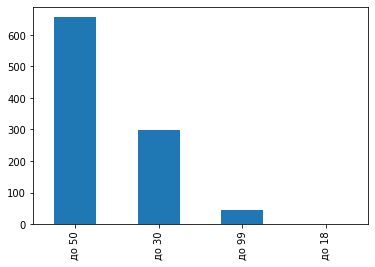

In [31]:
df.AgeGroup.value_counts().plot.bar();

<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 5: Время приключений</h3> 
    </div>
</div>

Кто тут data scientist? Ты data scientist!

Докажи это! Исследуй данные вдоль и поперек!

Группируй с помощью __`.groupby()`__ строки по полу, семейному статусу и всему другому, что приходит в голову, и считай статистики: средние и медианные доходы, квадратные метры и размеры семей. Не забывай учитывать и нашу целевую переменную - благонадежность - и задавать себе вопросы, например, вот такие:

- *Правда ли, что чем больше у заемщика семья, тем большую сумму кредита он хочет получить?*
- *Правда ли, что мужчины в среднем владеют большей площадью недвижимости?*
- *Правда ли, что старшее поколение более надежно в деле выплат?*
- *Правда ли, что молодые больше зарабатывают?*

Вперед! Не подведи!

In [35]:
df.groupby('Sex').mean()

,Age,Married,Dependents,Income,Experience,TermOfStay,RealEstate,MonthlyPayment,Trustworthy,PaymentFraction,FamilyMembers,RelativeIncome
Sex,,,,,,,,,,,,
0.0,34.595989,0.613181,1.020057,13207.736390,12.189112,13.856734,14.386819,4005.343840,0.438395,0.395745,1.633238,NaN
1.0,34.353846,0.578462,1.050769,13348.923077,12.399231,13.281538,14.884615,4100.021538,0.521538,0.400391,1.629231,NaN


In [36]:
df.groupby('FamilyMembers').mean()

,Age,Sex,Married,Dependents,Income,Experience,TermOfStay,RealEstate,MonthlyPayment,Trustworthy,PaymentFraction,RelativeIncome
FamilyMembers,,,,,,,,,,,,
0.0,35.459259,0.681481,0.000000,0.000000,13066.666667,12.907407,14.533333,15.792593,4297.385185,0.614815,0.453489,NaN
1.0,34.288630,0.658892,0.562682,0.437318,12691.545190,12.470845,13.209913,15.189504,4015.338192,0.577259,0.385698,8676.206997
2.0,34.419162,0.616766,0.709581,1.290419,13625.149701,11.964072,13.733533,14.937126,4013.359281,0.449102,0.397263,4805.895210
3.0,33.528571,0.642857,0.878571,2.121429,13800.714286,12.225000,12.614286,13.314286,4054.828571,0.357143,0.387645,3248.628571
4.0,35.972973,0.783784,0.729730,3.270270,14554.054054,12.756757,12.648649,11.756757,4133.783784,0.243243,0.371705,2605.067568
5.0,33.500000,0.700000,1.000000,4.000000,14770.000000,11.400000,15.500000,6.600000,4438.300000,0.200000,0.414459,2066.340000


In [37]:
df.groupby('AgeGroup').mean()

,Age,Sex,Married,Dependents,Income,Experience,TermOfStay,RealEstate,MonthlyPayment,Trustworthy,PaymentFraction,FamilyMembers,RelativeIncome
AgeGroup,,,,,,,,,,,,,
до 18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
до 30,26.653199,0.676768,0.629630,0.962963,12841.077441,7.966330,11.861953,14.700337,4000.996633,0.498316,0.413353,1.592593,NaN
до 50,36.561644,0.631659,0.573820,1.118721,13395.585997,13.839422,13.528158,14.337900,4123.716895,0.473364,0.398208,1.692542,NaN
до 99,54.822222,0.755556,0.577778,0.400000,14924.444444,19.000000,23.511111,20.222222,3673.355556,0.733333,0.310674,0.977778,inf


C:\Users\Artem\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


Age                                                      \
               count       mean       std   min   25%   50%    75%   max   
FamilyMembers                                                              
0.0            135.0  35.459259  8.416192  22.0  29.5  35.0  39.00  58.0   
1.0            343.0  34.288630  7.589702  22.0  29.0  34.0  38.00  59.0   
2.0            334.0  34.419162  6.552014  22.0  30.0  34.0  38.00  59.0   
3.0            140.0  33.528571  6.126300  22.0  29.0  34.0  37.00  58.0   
4.0             37.0  35.972973  6.710218  23.0  31.0  36.0  40.00  50.0   
5.0             10.0  33.500000  5.948856  25.0  29.0  32.5  39.25  42.0   

                 Sex            ... PaymentFraction           RelativeIncome  \
               count      mean  ...             75%       max          count   
FamilyMembers                   ...                                            
0.0            135.0  0.681481  ...        0.606890  1.960870          135.0   
1.0            343.0  0.658892  ...        0.501089  1.953750          343.0   
2.0            334.0  0.616766  ...        0.505354  2.228261          334.0   
3.0            140.0  0.642857  ...        0.496737  1.834211          140.0   
4.0             37.0  0.783784  ...        0.534783  0.861067           37.0   
5.0             10.0  0.700000  ...        0.543386  0.973750           10.0   

                                                                            \
                      mean          std          min      25%          50%   
FamilyMembers                                                                
0.0                    NaN          NaN         -inf      inf          NaN   
1.0            8676.206997  6519.095435 -3052.000000  4084.00  7092.000000   
2.0            4805.895210  4083.411039 -1412.500000  1964.25  3637.000000   
3.0            3248.628571  2649.411159 -1056.666667  1517.25  2662.333333   
4.0            2605.067568  2169.290613   260.500000   955.50  1653.000000   
5.0            2066.340000  2176.883573    42.000000   958.70  1111.000000   

                                   
                     75%      max  
FamilyMembers                      
0.0                  inf      inf  
1.0            10665.000  34395.0  
2.0             6023.625  18404.0  
3.0             4019.250  11795.0  
4.0             3513.000   7625.5  
5.0             2294.150   6203.0  

[6 rows x 96 columns]